In [1]:
import pandas as pd


In [2]:
diabetes = pd.read_csv('diabetes.csv')

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Group
0,6,148,72,35,0,33.6,0.627,50,1,C
1,1,85,66,29,0,26.6,0.351,31,0,B
2,8,183,64,0,0,23.3,0.672,32,1,B
3,1,89,66,23,94,28.1,0.167,21,0,C
4,0,137,40,35,168,43.1,2.288,33,1,A


In [4]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Group'],
      dtype='object')

In [5]:
cols_to_norm = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']

In [6]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x-x.min()) / x.max()-x.min())

In [7]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.148860,50,1,C
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.034810,31,0,B
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.167455,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,-0.041223,21,0,C
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.835223,33,1,A


In [8]:
import tensorflow as tf

In [9]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Group'],
      dtype='object')

In [28]:
num_preg = tf.feature_column.numeric_column('Pregnancies')
plasma_gluc = tf.feature_column.numeric_column('Glucose')
dias_pressure = tf.feature_column.numeric_column('BloodPressure')
tricep = tf.feature_column.numeric_column('SkinThickness')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('DiabetesPedigreeFunction')
age = tf.feature_column.numeric_column('Age')

In [57]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [58]:
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

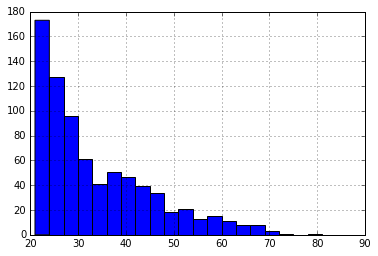

In [60]:
diabetes['Age'].hist(bins=20)

In [61]:
age_bucket = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [62]:
feat_cols = [num_preg, plasma_gluc, dias_pressure, tricep, insulin, diabetes_pedigree, assigned_group, age_bucket]

# TRAIN TEST SPLIT

In [63]:
x_data = diabetes.drop('Outcome', axis=1)


In [64]:
x_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.148860,50,C
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.034810,31,B
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.167455,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,-0.041223,21,C
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.835223,33,A


In [37]:
labels = diabetes['Outcome']

In [38]:
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.33, random_state=101)


In [41]:
##labels

In [42]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size= 10, num_epochs=1000, shuffle=True)

In [43]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_id': 0, '_evaluation_master': '', '_model_dir': '/tmp/tmpwsl13_e8', '_global_id_in_cluster': 0, '_master': '', '_num_worker_replicas': 1, '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_tf_random_seed': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f452fcbc9e8>, '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_service': None, '_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_save_summary_steps': 100, '_is_chief': True, '_train_distribute': None}


In [44]:
model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpwsl13_e8/model.ckpt.
INFO:tensorflow:step = 1, loss = 6.931472
INFO:tensorflow:global_step/sec: 146.496
INFO:tensorflow:step = 101, loss = 6.577395 (0.700 sec)
INFO:tensorflow:global_step/sec: 274.469
INFO:tensorflow:step = 201, loss = 5.724467 (0.351 sec)
INFO:tensorflow:global_step/sec: 276.822
INFO:tensorflow:step = 301, loss = 5.357339 (0.378 sec)
INFO:tensorflow:global_step/sec: 239.028
INFO:tensorflow:step = 401, loss = 3.6885343 (0.411 sec)
INFO:tensorflow:global_step/sec: 109.165
INFO:tensorflow:step = 501, loss = 3.0044973 (0.913 sec)
INFO:tensorflow:global_step/sec: 246.467
INFO:tensorflow:step = 601, loss = 2.6857483 (0.401 sec)
INFO:tensorflow:global_step/sec: 321.292
INFO:tensorflow:step

In [49]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test,
                                                      batch_size=10, 
                                                      num_epochs=1,
                                                     shuffle=False)

In [52]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-08-02-02:44:15
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpwsl13_e8/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Error reported to Coordinator: <class 'tensorflow.python.framework.errors_impl.InternalError'>, Unable to get element as bytes.


InternalError: Unable to get element as bytes.

In [54]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1, shuffle=False)
                                                    

In [55]:
predictions = model.predict(pred_input_func)

In [56]:
my_pred = list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpwsl13_e8/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Error reported to Coordinator: <class 'tensorflow.python.framework.errors_impl.InternalError'>, Unable to get element as bytes.


InternalError: Unable to get element as bytes.